# PJ01: Choose Your Own Analysis
In this project, I will be using python to help me parse and alayze a set of data to test a hypothesis and reach a conclusion.

# My Hypothesis: Students in synchronous sections of the class prefer that the class includes synchronous live lectures and require attendance.
I'm taking this question off the suggested questions from the project instruction page, because I think it's a really interesting topic especially with the recent switch to online learning spaces over the past couple of years. I personally tend to prefer synchronous sections myself when I can get them, and I think having live lectures is more engaging and easier to follow than virtual ones, so I assume that logic would apply to other students as well, especially in a class where students are given the choice between synchronous and asynchronous sections.

That being said, this is merely a hypothesis, and now it is time to test that hypothesis and reach a data-supported conclusion. To begin, I'll implement a special cell that automatically reloads any changes I make and save in modules I import. This is a section of code provided to us both in the last exercise and in the project instructions. The special conventions in the cell below are turning this feature on. Also included in this cell is the author string.

In [2]:
__author__ = "730312274"

%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


Next, I will import the data I will be using to test this hypothesis and turning it into a column-oriented table so I can work with it.

In [3]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

# Next, I'm going to select the relevant columns of the datasets for this hypothesis: section, and all_sync.
I'll the display the first five rows of each of those columns. This will also use the tabulate function we learned about in the previous exercise to help display the data in a neatly-presented table.

In [4]:
from data_utils import head, select
from tabulate import tabulate
subset: dict[str, list[str]] = select(columns, ["section", "all_sync"])
tabulate(head(subset, 5), subset.keys(), "html")

section,all_sync
In-Person,2
In-Person,4
Remote,1
,1
Remote,1


# For the sake of interest, I am also going to count responses to see how many students are in in-person sections and how many students are in remote sections.
While these figures will have no direct usage in the analysis of the hypothesis, as I will be using the average rating among students from each section to determine how much students in each section prefer the classes be required, in-person, and synchronous, it is worth noting that if one section has many more students than the other, each student's individual rating will have more weight for their section's average in whichever section is smaller.

In [5]:
from data_utils import count
sync_count: dict[str, int] = count(subset["section"])
print(f"{sync_count['In-Person']} people attend in-person sections.")
print(f"{sync_count['Remote']} people attend remote sections.")

350 people attend in-person sections.
192 people attend remote sections.


# Next, I will filter through the section data to create a couple "masks" that separate students taking the class in person, those taking it remotely, and those that did not respond to the section question in the survey.
This was accomplished using a function to create "masks" of True/False boolean values, based on collumn-oritented filtering that was taught in a recent class lesson. `mask_in_person` is a list of booleans that is only True when the respondent answered that they are taking the class In-Person. `mask_remote` is a list of booleans that is only True when the respondent answered that they are taking the class Remote. 

Note that if a person did not answer the `section` part of the survey, neither list finds it True. These data points were intentionally excluded because there is no way to determine whether or not the respondent was taking the class In-Person or Remote. 

Only the first 5 values of each of the "masks" is being displayed here through the use of a head function I created specifically for boolean lists.

In [6]:
from data_utils import maskmake, boollisthead
mask_in_person: list[bool] = maskmake(subset, "section", "In-Person")
mask_remote: list[bool] = maskmake(subset, "section", "Remote")
print(boollisthead(mask_in_person, 5))
print(boollisthead(mask_remote, 5))

[True, True, False, False, False]
[False, False, True, False, True]


# Using the "masks" created in the previous step, I can grab the all_sync ratings filtered for just those in an in-person section and just those taking in a remote section.
This was accomplished using a function that filters the data in a specified column of column-oriented data based on the mask created previously. `in_person_ratings` is the list of all the ratings made by those in in-person sections. `remote_ratings` is the list of all the ratings made by those in remote sections.

Like above, only the first five values of these ratings lists are being displayed, accomplished using another head function I created, this one specifically for string lists, since all the ratings are in the form of strings despite being numbers.

In [7]:
from data_utils import maskuser, strlisthead
in_person_ratings: list[str] = maskuser(subset, mask_in_person, "all_sync")
remote_ratings: list[str] = maskuser(subset, mask_remote, "all_sync")
print(strlisthead(in_person_ratings, 5))
print(strlisthead(remote_ratings, 5))

['2', '4', '4', '1', '1']
['1', '1', '3', '2', '1']


# In order to work with the data from the ratings lists, they must first be converted from strings into integers.
This is accomplished using a function that produces a list of integers based on a list of strings using the `int()` function.

Like above, only the first five values of these integer lists are being displayed, accomplished using another head function I created, this one specifically for integer lists.

In [8]:
from data_utils import intconverter, intlisthead
in_person_ratings_int: list[int] = intconverter(in_person_ratings)
remote_ratings_int: list[int] = intconverter(remote_ratings)
print(intlisthead(in_person_ratings_int, 5))
print(intlisthead(remote_ratings_int, 5))

[2, 4, 4, 1, 1]
[1, 1, 3, 2, 1]


# Using these filtered all-sync ratings, I can compare the average rating of those in in-person sections to those in remote sections. The higher the average, the more a group prefers synchronous in-person sections with required attendance.

In [9]:
from data_utils import averagemachine
in_person_average: float = averagemachine(in_person_ratings_int)
remote_average: float = averagemachine(remote_ratings_int)
print(f"The average rating of students in in-person sections is {in_person_average}.")
print(f"The average rating of students in remote sections is {remote_average}.")

The average rating of students in in-person sections is 3.2742857142857145.
The average rating of students in remote sections is 3.5260416666666665.


# In addition to the averages, here's a double-bar graph showing specifically how many students in each section gave each rating.
These graphs were generated using a count function specifically for counting lists of integers. The dictionaries that count function produces were thrown into 3rd party functions that were demonstrated at the end of `data_wrangling.ipynb` which was included as part of the last exercise.

<BarContainer object of 7 artists>

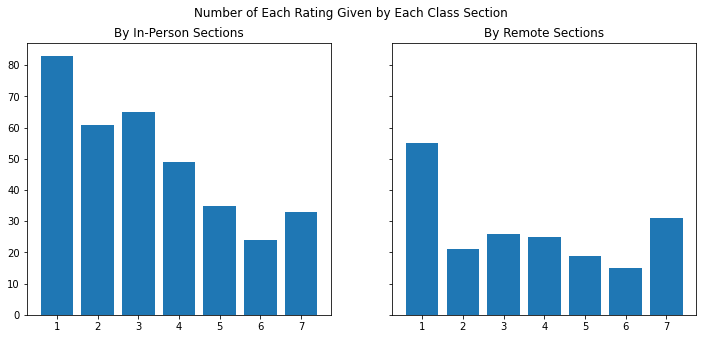

In [10]:
from matplotlib import pyplot as plt
from data_utils import intcount

inperson_count: dict[int, int] = intcount(in_person_ratings_int)
remote_count: dict[int, int] = intcount(remote_ratings_int)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Number of Each Rating Given by Each Class Section")


axes[0].set_title("By In-Person Sections")
axes[0].bar(inperson_count.keys(), inperson_count.values())

axes[1].set_title("By Remote Sections")
axes[1].bar(remote_count.keys(), remote_count.values())

# Conclusion
Overall, it appears that being in an in-person section or a remote section has little-to-no affect on whether a student prefers that the class includes synchronous live lectures and require attendance. The average rating among both in-person and remote sections was similar, and it appears remote sections slightly favor mandatory in-person live lectures over in-person sections. 

If the section does have an affect on whether a student believes the class should have required in-person live sections, the extra favor that remote sections have compared to in-person sections may be caused by those in remote classes being forced to take the class remote due to the pandemic, and those students eager to get back on to campus and thus prefer in-person learning to remote learning. However, the diference between the average rating of students in-person and the average rating of students remote seems negligable, and it would be interesting to run this experiment yearly to see if the results change as the pandemic ends and other classes go back to a traditional in-person schedule. 

It is also worth noting that there are many more students attending in-person sections than remote sections, so the individual ratings of students in remote sections had more weighting on their average than the ratings of in-person students had on their's. Thus, outliers in the remote section ratings may have skewed the rating more than those in the in-person dataset. That being said, however, looking at the visual bar graph representation of how members of each section rated, they both follow a similar trend/shape in how people voted to each rating, further supporting the idea that class section had little effect on rating.

I am inclined to conclude based on the data given to me that the style of COMP-110 class has no significant affect on whether or not a student prefers COMP-110 have required, synchronous, live, in-person sections, and thus my hypothesis from the beginning is not supported.